# Análise de vendas
Esse material pertence ao curso **Data Science: Introdução a análise de séries temporais** da Alura.

## Preparando o ambiente

In [163]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

sns.set(rc={'figure.figsize':(18, 12)})

## Carregando os dados

In [2]:
alucar = pd.read_csv('dados/alucar.csv')
alucar.sample(10)

,mes,vendas
5,2017-06-30,81
3,2017-04-30,47
19,2018-08-31,527
15,2018-04-30,362
14,2018-03-31,326
7,2017-08-31,124
20,2018-09-30,573
1,2017-02-28,20
17,2018-06-30,440
2,2017-03-31,33


In [3]:
alucar.shape

(24, 2)

In [4]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


Os dados parecem estar completos, sem valores nulos

In [5]:
alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

## Ajustando os dados

In [9]:
alucar.mes = pd.to_datetime(alucar.mes)
alucar.sample(10)

,mes,vendas
5,2017-06-30,81
4,2017-05-31,63
6,2017-07-31,101
3,2017-04-30,47
9,2017-10-31,174
21,2018-10-31,621
0,2017-01-31,10
1,2017-02-28,20
12,2018-01-31,261
7,2017-08-31,124


In [10]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

## Análise gráfica inicial

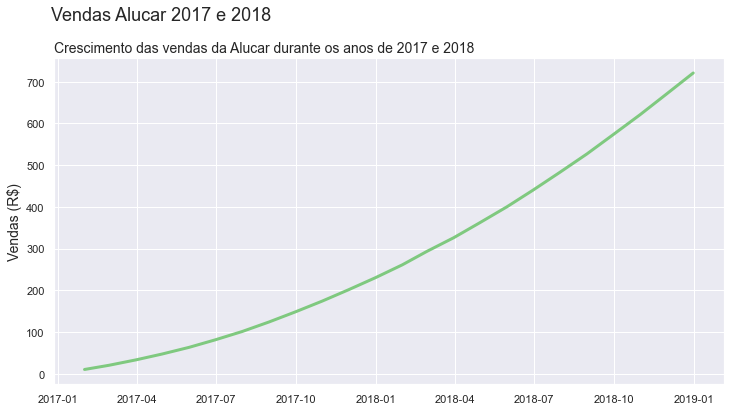

In [92]:
# Define a paleta de cores
sns.set_palette('Accent')

# Define o estilo do gráfico
sns.set_style('darkgrid')

# Cria a figura. O parâmetro linewidth define a espessura da linha
fig = sns.lineplot(x = 'mes', data = alucar, y = 'vendas', linewidth = 3)

# Define o tamanho da figura
fig.figure.set_size_inches(12,6)

# Adiciona um subtítulo à figura. Note que o subtítulo é apresentado acima do título.
# y e x informam a posição do texto no gráfico.
plt.suptitle('Vendas Alucar 2017 e 2018',y = 1, fontsize = 18, x = 0.249)

# Adiciona o título ao gráfico posicionado à esquerda.
fig.set_title('Crescimento das vendas da Alucar durante os anos de 2017 e 2018', fontsize = 14, loc = 'left');

# Informa a label para o eixo X.
# Nesse caso, deixei ela vazia pois os dados informam ao o usuário do que se trata e seria poluição visual
fig.set_xlabel('')

# Label para eixo y com seu respectivo tamanho de fonte
fig.set_ylabel('Vendas (R$)', fontsize = 14);

## Decomposição
### Aumento

In [93]:
alucar['aumento'] = alucar[['vendas']].diff()
alucar

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0
5,2017-06-30,81,18.0
6,2017-07-31,101,20.0
7,2017-08-31,124,23.0
8,2017-09-30,148,24.0
9,2017-10-31,174,26.0


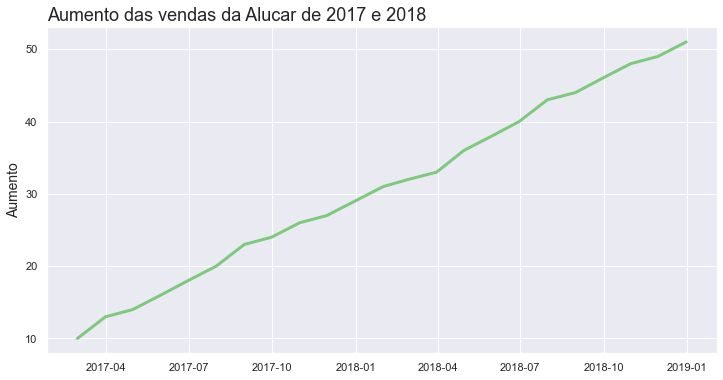

In [97]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax: ax = sns.lineplot(x='mes', y='aumento', data=alucar, linewidth = 3)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Aumento', fontsize=14);

### Crescimento mensal

In [143]:
crescimento_mensal = np.array([np.NaN])
for index in range(1, len(alucar.vendas)):
    crescimento = round(((alucar.vendas[index] / alucar.vendas[index - 1]) - 1), 2)
    print(crescimento)
    crescimento_mensal = np.append(crescimento_mensal, crescimento)
alucar['crescimento_mensal'] = crescimento_mensal
alucar
    

1.0
0.65
0.42
0.34
0.29
0.25
0.23
0.19
0.18
0.16
0.14
0.13
0.12
0.11
0.11
0.1
0.1
0.1
0.09
0.09
0.08
0.08
0.08


,mes,vendas,aumento,crescimento_mensal
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,1.00
2,2017-03-31,33,13.0,0.65
3,2017-04-30,47,14.0,0.42
4,2017-05-31,63,16.0,0.34
5,2017-06-30,81,18.0,0.29
6,2017-07-31,101,20.0,0.25
7,2017-08-31,124,23.0,0.23
8,2017-09-30,148,24.0,0.19
9,2017-10-31,174,26.0,0.18


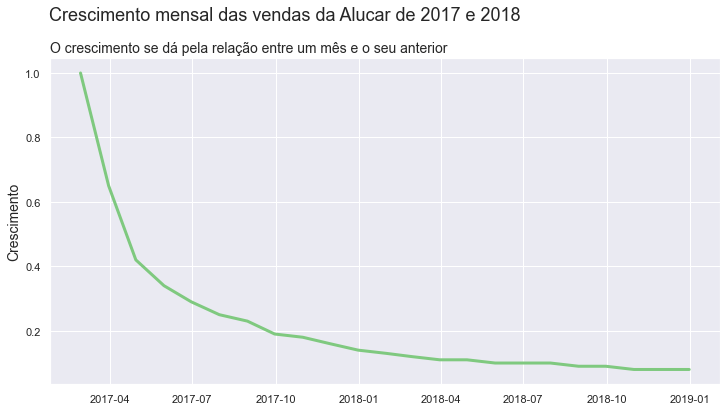

In [152]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax: ax = sns.lineplot(x='mes', y='crescimento_mensal', data=alucar, linewidth = 3)
ax.figure.set_size_inches(12,6)
ax.set_title('O crescimento se dá pela relação entre um mês e o seu anterior', loc='left', fontsize=14)
plt.suptitle('Crescimento mensal das vendas da Alucar de 2017 e 2018',y = 1, fontsize = 18, x = 0.397)
ax.set_xlabel('')
ax.set_ylabel('Crescimento', fontsize=14);

In [145]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar

,mes,vendas,aumento,crescimento_mensal,aceleracao
0,2017-01-31,10,NaN,NaN,NaN
1,2017-02-28,20,10.0,1.00,NaN
2,2017-03-31,33,13.0,0.65,3.0
3,2017-04-30,47,14.0,0.42,1.0
4,2017-05-31,63,16.0,0.34,2.0
5,2017-06-30,81,18.0,0.29,2.0
6,2017-07-31,101,20.0,0.25,2.0
7,2017-08-31,124,23.0,0.23,3.0
8,2017-09-30,148,24.0,0.19,1.0
9,2017-10-31,174,26.0,0.18,2.0


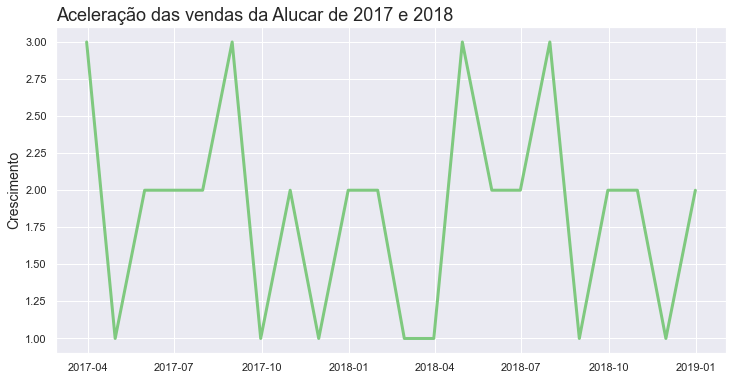

In [147]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax: ax = sns.lineplot(x='mes', y='aceleracao', data=alucar, linewidth = 3)
ax.figure.set_size_inches(12,6)
ax.set_title('Aceleração das vendas da Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('')
ax.set_ylabel('Crescimento', fontsize=14);

É possível notar uma certa sazonalidade nas vendas.

### Agrupando as visualizações

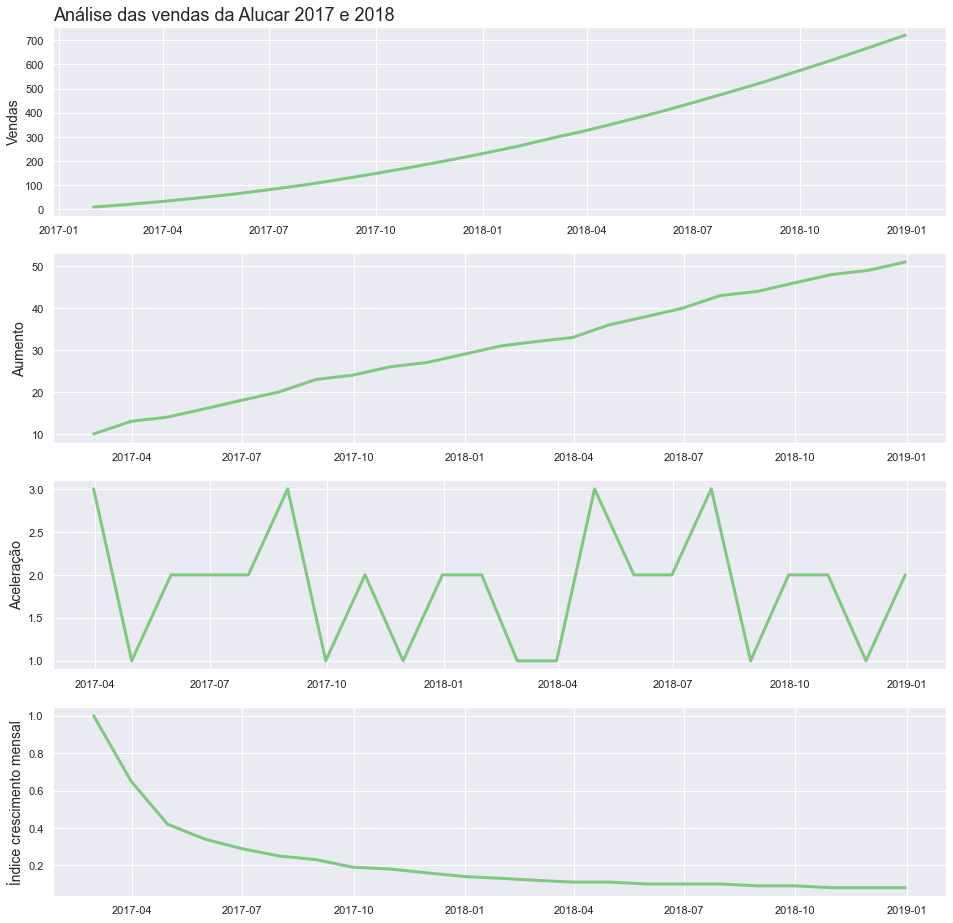

In [162]:
plt.figure(figsize=(16,16))

ax = plt.subplot(4,1,1)
ax.set_title('Análise das vendas da Alucar 2017 e 2018',fontsize=18, loc='left')
lp_vendas = sns.lineplot(x='mes', y='vendas', data=alucar, linewidth = 3)
lp_vendas.set_xlabel('')
lp_vendas.set_ylabel('Vendas', fontsize=14);

plt.subplot(4,1,2)
lp_aumento = sns.lineplot(x='mes', y='aumento', data=alucar, linewidth = 3)
lp_aumento.set_xlabel('')
lp_aumento.set_ylabel('Aumento', fontsize=14);

plt.subplot(4,1,3)
lp_aceleracao = sns.lineplot(x='mes', y='aceleracao', data=alucar, linewidth = 3)
lp_aceleracao.set_xlabel('')
lp_aceleracao.set_ylabel('Aceleração', fontsize=14);

plt.subplot(4,1,4)
lp_crescimento_mensal = sns.lineplot(x='mes', y='crescimento_mensal', data=alucar, linewidth = 3)
lp_crescimento_mensal.set_xlabel('')
lp_crescimento_mensal.set_ylabel('Índice crescimento mensal', fontsize=14);

## Autocorrelação
Medida de correlação entre as medidas de uma série temporal. Movimentando o valor através dele mesmo. Os valores da correlação são distribuídos entre -1 (correlação mínima/inversa) e 1 (correlação máxima)

A autocorrelação é a correlação cruzada de um sinal com o ele próprio. É uma ferramenta matemática para encontrar padrões de repetição, tal como a presença de um sinal periódico obscurecidos pelo ruído, ou para identificar a frequência fundamental em falta num sinal implícita pelas suas frequências harmónicas. É frequentemente utilizada no processamento de sinais para a análise de funções ou série de valores, como por exemplo sinais no domínio do tempo.

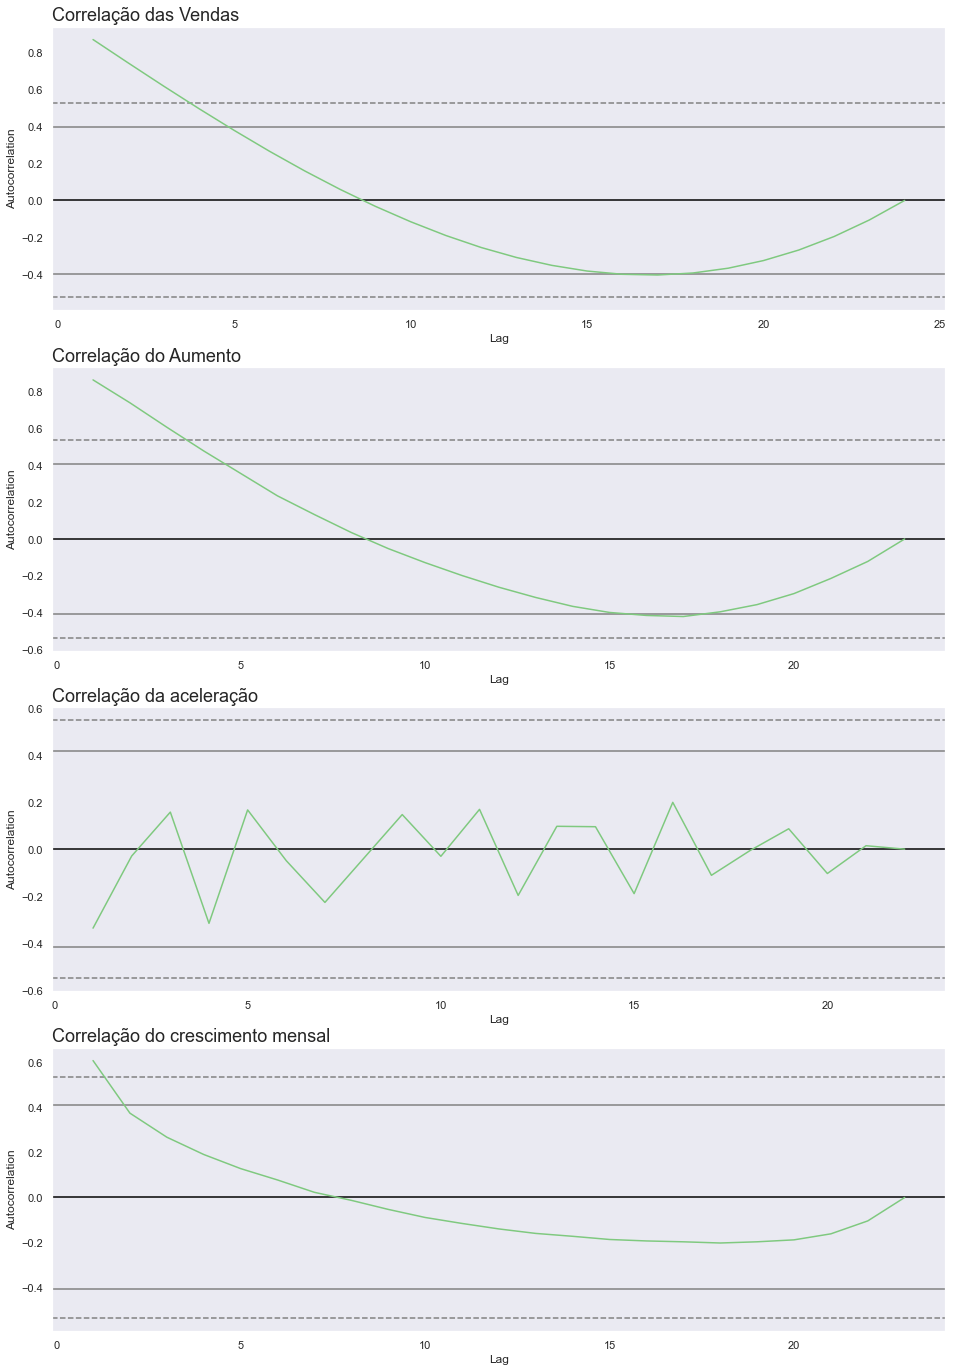

In [186]:
plt.figure(figsize=(16,24))
sns.set_palette('Accent')

ac_vendas = plt.subplot(4,1,1)
autocorrelation_plot(alucar['vendas'], ax = ac_vendas);
ac_vendas.set_title('Correlação das Vendas', fontsize = 18, loc='left')


ac_aumento = plt.subplot(4,1,2)
autocorrelation_plot(alucar['aumento'][1:], ax = ac_aumento);
ac_aumento.set_title('Correlação do Aumento', fontsize = 18, loc='left')


ac_aceleracao = plt.subplot(4,1,3)
autocorrelation_plot(alucar['aceleracao'][2:], ax = ac_aceleracao);
ac_aceleracao.set_title('Correlação da aceleração', fontsize = 18, loc='left')


ac_cresc_mensal = plt.subplot(4,1,4)
autocorrelation_plot(alucar['crescimento_mensal'][1:], ax = ac_cresc_mensal);
ac_cresc_mensal.set_title('Correlação do crescimento mensal', fontsize = 18, loc='left');


É possível notar que a aceleração possui uma certa periodicidade. Isso indica, junto com o `lineplot` desse dado de que exista uma certa sazonalidade nas vendas.